<a href="https://colab.research.google.com/github/sephora-codes/Bitcoin-Price-Prediction-Using-LSTM/blob/main/Bitcoin_Main_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import io
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD (1).csv


In [ ]:
# Load our dataset


maindf=pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2192
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(2192, 7)

In [ ]:
maindf.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951,2041.199951,1147859968
1,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,2173.399902,1942220032
2,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952
3,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1725379968
4,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2406700032


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2187,2023-05-17,27035.470703,27465.927734,26600.144531,27398.802734,27398.802734,15140006925
2188,2023-05-18,27401.650391,27466.527344,26415.101563,26832.208984,26832.208984,15222938600
2189,2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906,26890.128906,11258983301
2190,2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938,27129.585938,7044911360
2191,2023-05-21,27102.992188,27265.917969,26827.013672,26901.455078,26901.455078,8295129600


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2.192000e+03
mean,19125.251059,19598.920937,18603.064085,19134.569787,19134.569787,2.395732e+10
std,16278.188587,16691.351207,15797.662402,16270.970752,16270.970752,1.957353e+10
min,1932.619995,2058.770020,1843.030029,1929.819946,1929.819946,5.278560e+08
25%,7177.894897,7334.718262,6981.595947,7190.725220,7190.725220,7.644102e+09
50%,10848.807617,11101.397949,10545.243653,10861.885742,10861.885742,2.137903e+10
75%,28465.467285,29158.113769,27952.406739,28460.854981,28460.854981,3.362843e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
#check null values
print('Null Values:',maindf.isnull().values.sum())


Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
maindf.shape


(2192, 7)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-05-21
Ending Date 2023-05-21


**Analysis of Year 2017**



In [ ]:
#StockPrice Analysis from Start
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2017 = maindf.loc[(maindf['Date'] >= '2017-05-21')
                     & (maindf['Date'] < '2017-12-31')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951
1,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902
2,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922
3,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893
4,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980
...,...,...,...,...,...
219,2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805
220,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000
221,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000
222,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Bitcoin Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2018**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
225,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
226,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
227,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
228,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
229,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
585,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
586,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
587,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
588,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2019**


In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
590,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
591,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
592,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
593,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
594,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
950,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
951,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
952,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
953,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2020**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
955,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
956,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
957,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
958,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
959,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
1316,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
1317,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
1318,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
1319,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2021**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2022-01-01')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1321,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
1322,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
1323,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
1324,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
1325,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
1681,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
1682,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
1683,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938
1684,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2022**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2023-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1686,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
1687,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
1688,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
1689,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
1690,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
2046,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
2047,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
2048,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797
2049,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2021**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2022-01-01')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1321,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
1322,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
1323,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
1324,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
1325,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
1681,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
1682,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
1683,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938
1684,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2022**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2023-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1686,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
1687,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
1688,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
1689,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
1690,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
2046,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
2047,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
2048,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797
2049,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of year 2023**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-05-22')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2051,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
2052,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
2053,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
2054,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
2055,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
2187,2023-05-17,27035.470703,27465.927734,26600.144531,27398.802734
2188,2023-05-18,27401.650391,27466.527344,26415.101563,26832.208984
2189,2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906
2190,2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Overall Analysis from 2017-2023**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2017-05-21')
                     & (maindf['Date'] <= '2023-05-22')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951
1,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902
2,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922
3,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893
4,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980
...,...,...,...,...,...
2187,2023-05-17,27035.470703,27465.927734,26600.144531,27398.802734
2188,2023-05-18,27401.650391,27466.527344,26415.101563,26832.208984
2189,2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906
2190,2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin Stock value'})
fig.update_layout(title_text='Bitcoin Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Building LSTM Model**

In [ ]:
## First Step is Preparing Data for Training and Testing
## Here we are just considering 1 year data for training data
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2192, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2017-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2022-05-21']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  364


In [ ]:
closedf

,Date,Close
1828,2022-05-23,29098.910156
1829,2022-05-24,29655.585938
1830,2022-05-25,29562.361328
1831,2022-05-26,29267.224609
1832,2022-05-27,28627.574219
...,...,...
2187,2023-05-17,27398.802734
2188,2023-05-18,26832.208984
2189,2023-05-19,26890.128906
2190,2023-05-20,27129.585938


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
### Normalizing Data
#Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
#MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(364, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (218, 1)
test_data:  (146, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (202, 15)
y_train:  (202,)
X_test:  (130, 15)
y_test (130,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (202, 15, 1)
X_test:  (130, 15, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 61ms/step - loss: 0.1209 - val_loss: 0.4566
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1075 - val_loss: 0.4246
Epoch 3/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0956 - val_loss: 0.3956
Epoch 4/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0827 - val_loss: 0.3635
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0710 - val_loss: 0.3254
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0588 - val_loss: 0.2874
Epoch 7/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0475 - val_loss: 0.2447
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0364 - val_loss: 0.1980
Epoch 9/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0274 - val_loss: 0.1526
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.1137
Epoch 11/200
7/7 [=

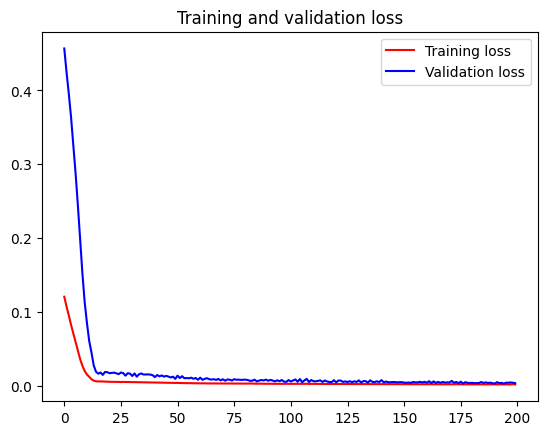

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 5ms/step


((202, 1), (130, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  729.8510599968708
Train data MSE:  532682.5697785559
Train data MAE:  489.1843624248143
-------------------------------------------------------------------------------------
Test data RMSE:  1001.0476519663983
Test data MSE:  1002096.4015074393
Test data MAE:  789.241811905769


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9271021048167984
Test data explained variance regression score: 0.9264103296996558


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9267004189187349
Test data R2 score: 0.8928913024754038


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0012446130919892347
Test data MGD:  0.001659884269907583
----------------------------------------------------------------------
Train data MPD:  25.582476612646943
Test data MPD:  40.428773026224704


In [ ]:
print("original_ytest data type:", original_ytest.dtype)
print("test_predict data type:", test_predict.dtype)

original_ytest data type: float64
test_predict data type: float32


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (364, 1)
Test predicted data:  (364, 1)


**PREDICTING BITCOIN PRICE FOR NEXT 30 DAYS**

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days of dataset and next predicted 30 days**

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting entire Closing Bitcoin Stock Price with next 30 days period of prediction**

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing Bitcoin stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()